# Импорт библиотек

In [5]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
from comet_ml import Experiment

In [35]:
# Создание эксперимента с помощью API ключа
experiment = Experiment(
    api_key="SRsdKL6T4Yqv9U8oGYV18T6bi",
    project_name="Homework_log",
    workspace="aleksandrfrom",
)

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/aleksandrfrom/homework-log/a168202781b04205a5908cbdf4ae14be
COMET INFO:   Parameters:
COMET INFO:     clip          : False
COMET INFO:     copy          : True
COMET INFO:     feature_range : (0, 1)
COMET INFO:   Uploads:
COMET INFO:     conda-info          : 1
COMET INFO:     conda-specification : 1
COMET INFO:     environment details : 1
COMET INFO:     figures             : 2
COMET INFO:     filename            : 1
COMET INFO:     git metadata        : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     os packages         : 1
COMET INFO:     source_code         : 1
COMET INFO: ---------------------------
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.

# Загрузка данных

In [36]:
df = pd.read_csv('data/KaggleV2-May-2016.csv')

In [37]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Визуализация

### Распределение числовых признаков

{'web': 'https://www.comet.ml/api/image/download?imageId=545b223f17ca498683fbfa9b45f39c3a&experimentKey=df986206c30740b1ad4de53f9729b9b0',
 'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=545b223f17ca498683fbfa9b45f39c3a&experimentKey=df986206c30740b1ad4de53f9729b9b0',
 'imageId': '545b223f17ca498683fbfa9b45f39c3a'}

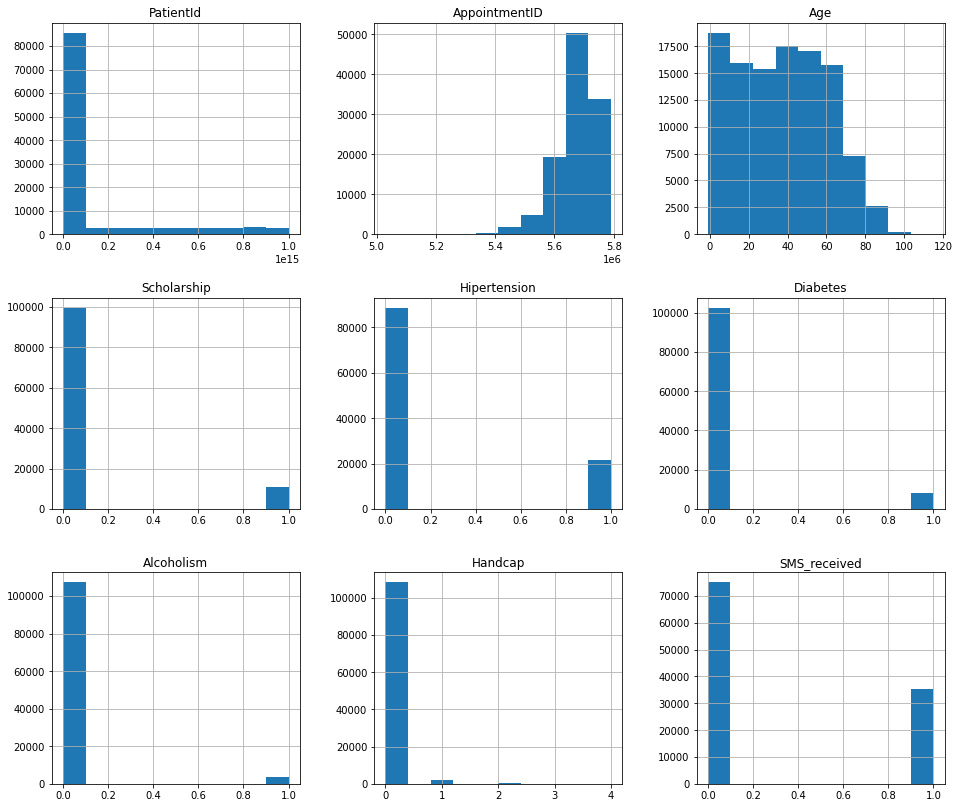

In [38]:
df.hist(figsize=(16,14));
#логируем гистограмму
experiment.log_figure(figure=plt)

*Проанализируем число людей каждого возраста*

In [39]:
print("Уникальные значения в `Age` => {}".format(df.Age.unique()))

Уникальные значения в `Age` => [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


In [40]:
# Удалим аномальные значения
df = df[(df.Age >= 0) & (df.Age <= 110)]
df.Age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
97       11
98        6
100       4
102       2
99        1
Name: Age, Length: 102, dtype: int64

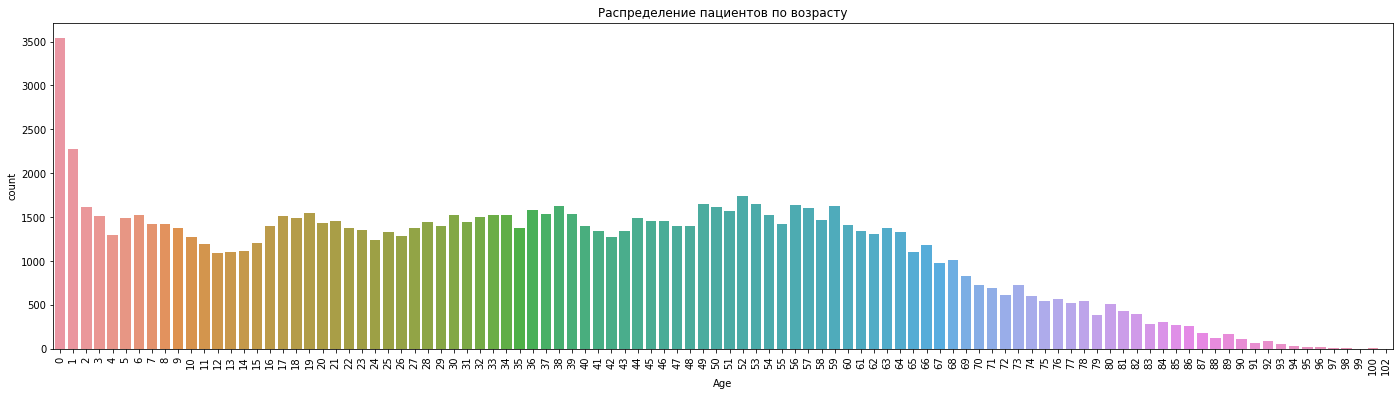

In [41]:
#распределение пациентов по возрасту
plt.figure(figsize=(24,6))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age)
ax.set_title("Распределение пациентов по возрасту")
experiment.log_figure(figure=plt)
plt.show()

In [43]:
#удаление столбцов, которые не будут использованы при определение корреляции
df.drop(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'No-show'], axis=1, inplace = True)

In [44]:
df.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,62,0,1,0,0,0,0
1,56,0,0,0,0,0,0
2,62,0,0,0,0,0,0
3,8,0,0,0,0,0,0
4,56,0,1,1,0,0,0


## Шкалирование данных

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df)

In [47]:
print(X.shape)

(110521, 7)


## Визуализация корреляции между 7 числовыми признаками

{'web': 'https://www.comet.ml/api/image/download?imageId=bcd7e78eb87f4d5cae1f74078a9804e4&experimentKey=df986206c30740b1ad4de53f9729b9b0',
 'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=bcd7e78eb87f4d5cae1f74078a9804e4&experimentKey=df986206c30740b1ad4de53f9729b9b0',
 'imageId': 'bcd7e78eb87f4d5cae1f74078a9804e4'}

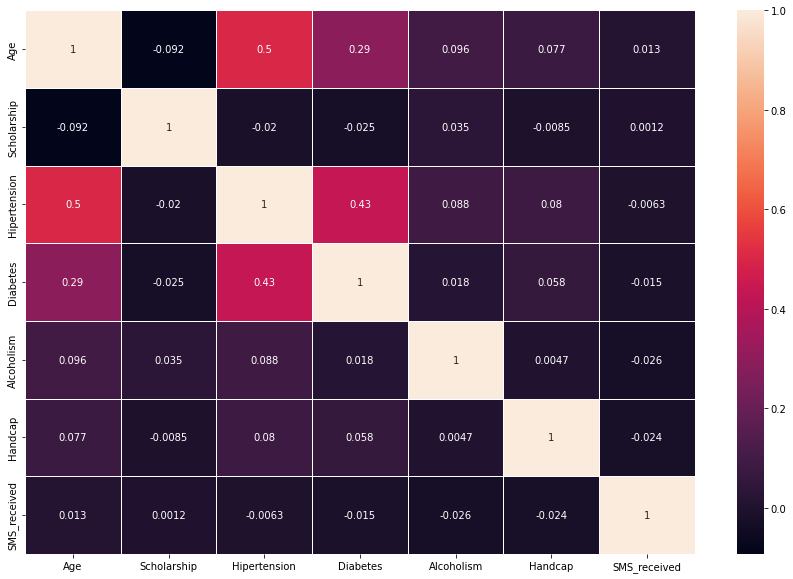

In [53]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

# логирование изображения в Comet
experiment.log_figure(figure=plt)

In [49]:
experiment.display()

In [54]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/aleksandrfrom/homework-log/df986206c30740b1ad4de53f9729b9b0
COMET INFO:   Parameters:
COMET INFO:     clip          : False
COMET INFO:     copy          : True
COMET INFO:     feature_range : (0, 1)
COMET INFO:   Uploads:
COMET INFO:     conda-info          : 1
COMET INFO:     conda-specification : 1
COMET INFO:     environment details : 1
COMET INFO:     figures             : 3
COMET INFO:     filename            : 1
COMET INFO:     git metadata        : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     os packages         : 1
COMET INFO:     source_code         : 1
COMET INFO: ---------------------------
COMET INFO: Uploading metrics, params, and assets to Comet before program termination (may tak